# Brownian motion

- [Langevin](#langevin)
    - [Euler method for a damped harmonic oscillator](#euler1)
    - [Application of Euler method](#euler2)
    - [The Wiener process](#wiener)
    - [Modified velocity](#velocity)
- [Computer simulation](#simulation)

<div id="langevin" />

## Langevin equation

##### Model for a Brownian particle in 3D

![](images/langevin.png)

\begin{equation}
m\frac{d\mathbf{V}(t)}{dt}=\color{blue}{-\zeta\mathbf{V}(t)}+\color{red}{\mathbf{F}(t)} 
\tag{21}
\end{equation}

##### Time evolution equations

\begin{equation}
\frac{d\mathbf{R}(t)}{dt}=\mathbf{V}(t)\tag{F1}
\end{equation}

\begin{equation}
m\frac{d\mathbf{V}(t)}{dt}=\color{black}{-\zeta\mathbf{V}(t)}+\color{black}{\mathbf{F}(t)} 
\tag{F2}
\end{equation}


##### Random force

\begin{equation}
\langle \mathbf{F}(t)\rangle=\mathbf{0} 
\tag{F3}
\end{equation}

\begin{equation}
\langle \mathbf{F}(t)\mathbf{F}(0)\rangle = {2k_B T\zeta}\mathbf{I}\delta(t)  
\tag{F4}
\end{equation}

<div id="euler1" />

### Remember: Euler method for a damped harmonic oscillator

$$
\frac{d\mathbf{R}(t)}{dt} =\mathbf{V}(t)\hspace{17mm} \tag{B1}
$$

$$
m\frac{d\mathbf{V}(t)}{dt}=-\zeta\mathbf{V}(t)-k\mathbf{R}(t) \tag{B2}
$$

$$
\mathbf{R}_{i+1}=\mathbf{R}_i+\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)\simeq\mathbf{R}_i+\mathbf{V}_i \Delta t \hspace{15mm}\tag{B3}
$$

$$
\mathbf{V}_{i+1}=\mathbf{V}_i-\frac{\zeta}{m}\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)-\frac{k}{m}\int_{t_i}^{t_{i+1}} dt\mathbf{R}(t)
$$
$$
\simeq\left(1-\frac{\zeta}{m}\Delta t\right)\mathbf{V}_i - \frac{k}{m} \mathbf{R}_i \Delta t \hspace{12mm}\tag{B4}
$$

<div id="euler2" />

### Remember: application of Euler method to Eqs. (F1) and (F2)

\begin{equation}
\mathbf{R}_{i+1}=\mathbf{R}_i+\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)\simeq\mathbf{R}_i+\mathbf{V}_i \Delta t 
\tag{F5}
\end{equation}

$$
\mathbf{V}_{i+1}=\mathbf{V}_i-\frac{\zeta}{m}\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)+\frac{1}{m}
\color{red}{
\int_{t_i}^{t_{i+1}} dt\mathbf{F}(t)}
$$
$$
\neq
\left(1-\frac{\zeta}{m}\Delta t\right)\mathbf{V}_i + \frac{1}{m} \color{red}{\mathbf{F}_i\Delta t} 
\tag{F6}
$$

$$
\because
\color{black}{\int_{t_i}^{t_{i+1}} dt\mathbf{F}(t)\neq\mathbf{F}_i\Delta t} 
\tag{F7}
$$

<div id="wiener" />

### The Wiener process. Cumulative impulse $\Delta \mathbf{W}_i$

$$
\int_{t_i}^{t_{i+1}} dt\mathbf{F}(t)
\equiv\Delta\mathbf{W}_i
\tag{F8}
$$

- $F_\alpha(t)\rightarrow$ A series of random numbers drawn from some distribution with an average and variance equal to zero and $2k_B T\zeta$, respectively.

- $\Delta W_{\alpha,i}$ $\rightarrow$ A series of random numbers drawn from a Gaussian distribution, with an average and variance equal to zero and $2k_B T\zeta\Delta t$, respectively. This is a consequence of the central limit theorem.

<div id="velocity" />

### Modified velocity update equation (Eq. (F6)$\rightarrow$(F9))

$$
\mathbf{V}_{i+1}=\mathbf{V}_i-\frac{\zeta}{m}\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)+\frac{1}{m}
\color{red}{
\int_{t_i}^{t_{i+1}} dt\mathbf{F}(t)}
$$
$$
\simeq\left(1-\frac{\zeta}{m}\Delta t\right)\mathbf{V}_i + \frac{1}{m} \color{red}{\Delta \mathbf{W}_i} 
\tag{F9}
$$

\begin{equation}
\langle \Delta \mathbf{W}_i\rangle=\mathbf{0} 
\tag{F10}
\end{equation}

\begin{equation}
\langle \Delta \mathbf{W}_i\Delta \mathbf{W}_j\rangle = {2k_B T\zeta}\Delta t\mathbf{I}\delta_{ij}  
\tag{F11}
\end{equation}

<div id="simulation" />

## Computer simulation

### Equations to be solved

##### Difference equations

\begin{equation}
\mathbf{R}_{i+1}=\mathbf{R}_i+\mathbf{V}_i \Delta t 
\tag{F5}
\end{equation}

$$
\mathbf{V}_{i+1}=
\left(1-\frac{\zeta}{m}\Delta t\right)\mathbf{V}_i + \frac{1}{m} \color{black}{\Delta \mathbf{W}_i} 
\tag{F9}
$$

##### Random force

\begin{equation}
\langle \Delta \mathbf{W}_i\rangle=\mathbf{0} 
\tag{F10}
\end{equation}

\begin{equation}
\langle \Delta \mathbf{W}_i\Delta \mathbf{W}_j\rangle = {2k_B T\zeta}\Delta t\mathbf{I}\delta_{ij}  
\tag{F11}
\end{equation}

##### Initial condition

$$
\mathbf{R}_0=0,\ \ \ \ \mathbf{V}_0=0\tag{F12}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib nbagg
plt.style.use("ggplot")

dim = 3 # system dimension (x,y,z)
nump = 100 # number of independent Brownian particles to simulate 
nums = 1024 # number of simulation steps
dt = 0.05 # set time increment, \Delta t
zeta = 1.0 # set friction constant, \zeta
m = 1.0 # set particle mass, m
kBT = 1.0 # set temperatute, k_B T

std  = np.sqrt(2*kBT*zeta*dt) # calculate std for \Delta W via Eq.(F11)
np.random.seed(0)

R = np.zeros([nump, dim]) # array to store current positions and set initial condition Eq.(F12)
V = np.zeros([nump, dim]) # array to store current velocities and set initial condition Eq.(F12)
W = np.zeros([nump, dim]) # array to store current random forcces
Rs = np.zeros([nums, nump, dim]) # array to store positions at all steps
Vs = np.zeros([nums, nump, dim]) # array to store velocities at all steps
Ws = np.zeros([nums, nump, dim]) # array to store random forces at all steps
time = np.zeros([nums]) # an array to store time at all steps

for i in range(nums):
    W = std*np.random.randn(nump, dim) # generate an array of random forces accordingly to Eqs.(F10) and (F11)
    R, V = R + V*dt, V*(1 - zeta/m*dt) + W/m # update R & V via Eqs.(F5)&(F9)
    Rs[i,:,:] = R
    Vs[i,:,:] = V
    Ws[i,:,:] = W
    time[i] = i*dt

<IPython.core.display.Javascript object>


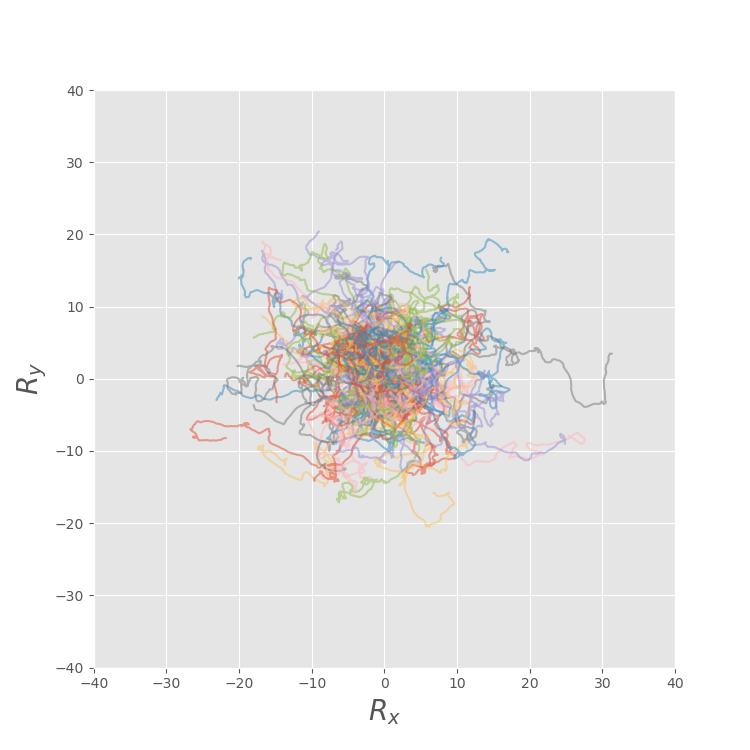

In [2]:
# PLot 2D
box = 80. # set draw area as box^2
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.set_xlabel(r"$R_x$", fontsize=20)
ax.set_ylabel(r"$R_y$", fontsize=20)
plt.xlim(-box/2, box/2)
plt.ylim(-box/2, box/2)

for n in range(nump):
    ax.plot(Rs[:, n, 0], Rs[:, n, 1], alpha=0.5)
    
plt.show()

<IPython.core.display.Javascript object>


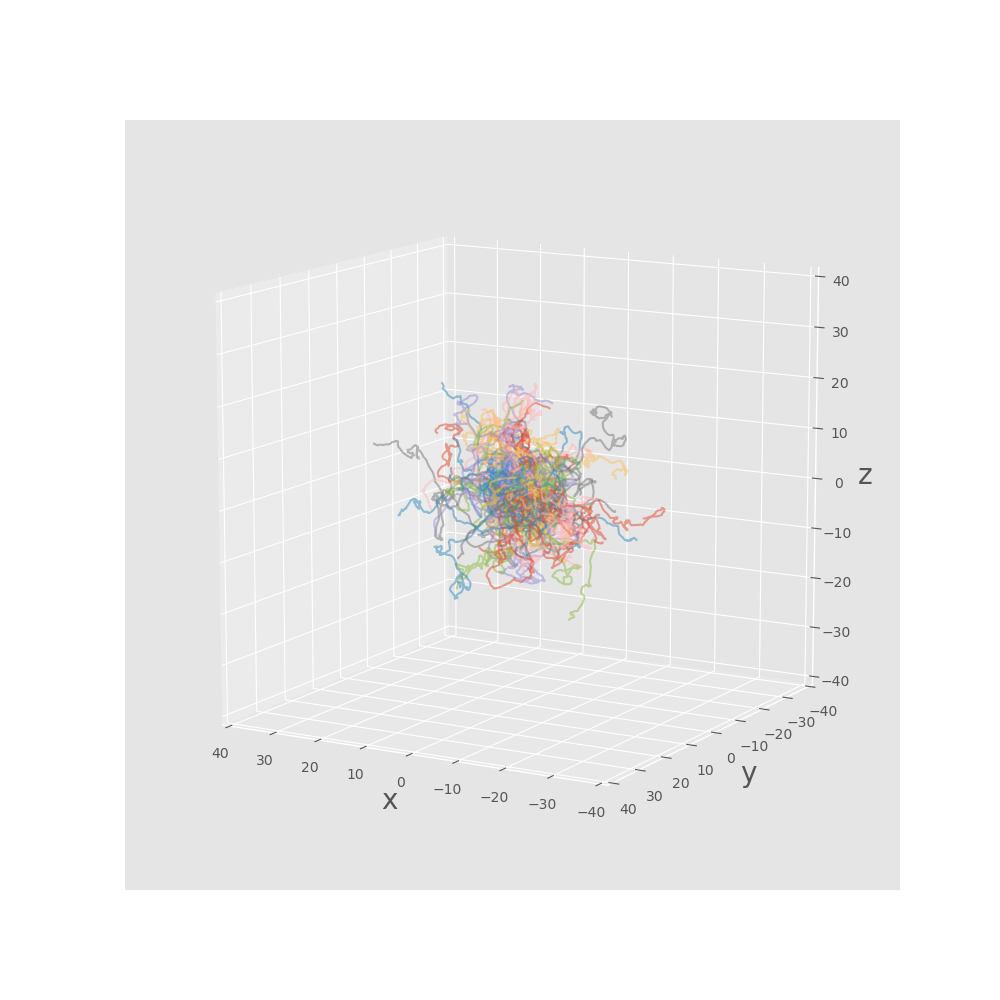

In [3]:
# PLot 3D
box = 80.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim(-box/2, box/2)
ax.set_ylim(-box/2, box/2)
ax.set_zlim(-box/2, box/2)
ax.set_xlabel(r"x", fontsize=20)
ax.set_ylabel(r"y", fontsize=20)
ax.set_zlabel(r"z", fontsize=20)
ax.view_init(elev=12, azim=120)

for n in range(nump):
    ax.plot(Rs[:, n, 0], Rs[:, n, 1], Rs[:, n, 2], alpha=0.5)
    
plt.show()